In [ ]:
pip install tensorflow

In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [3]:
#load data
(xtrain,ytrain),(xtest,ytest)=keras.datasets.fashion_mnist.load_data()

In [4]:
print(xtrain)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [5]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
ytrain[0]

9

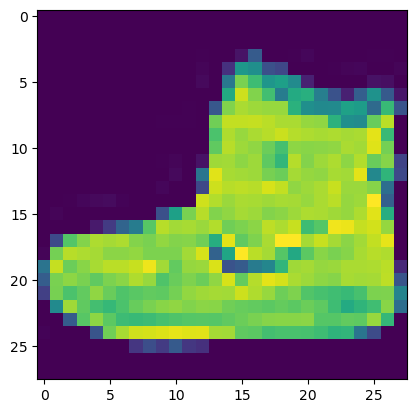

In [7]:
#to see image
plt.imshow(xtrain[0])

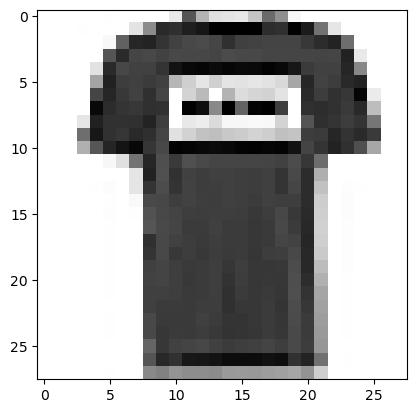

In [8]:
plt.imshow(xtrain[1],cmap='Greys')

In [9]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot '''

'\n0 => T-shirt/top\n1 => Trouser\n2 => Pullover\n3 => Dress\n4 => Coat\n5 => Sandal\n6 => Shirt\n7 => Sneaker\n8 => Bag\n9 => Ankle boot '

In [10]:
import numpy as np
import pandas as pd

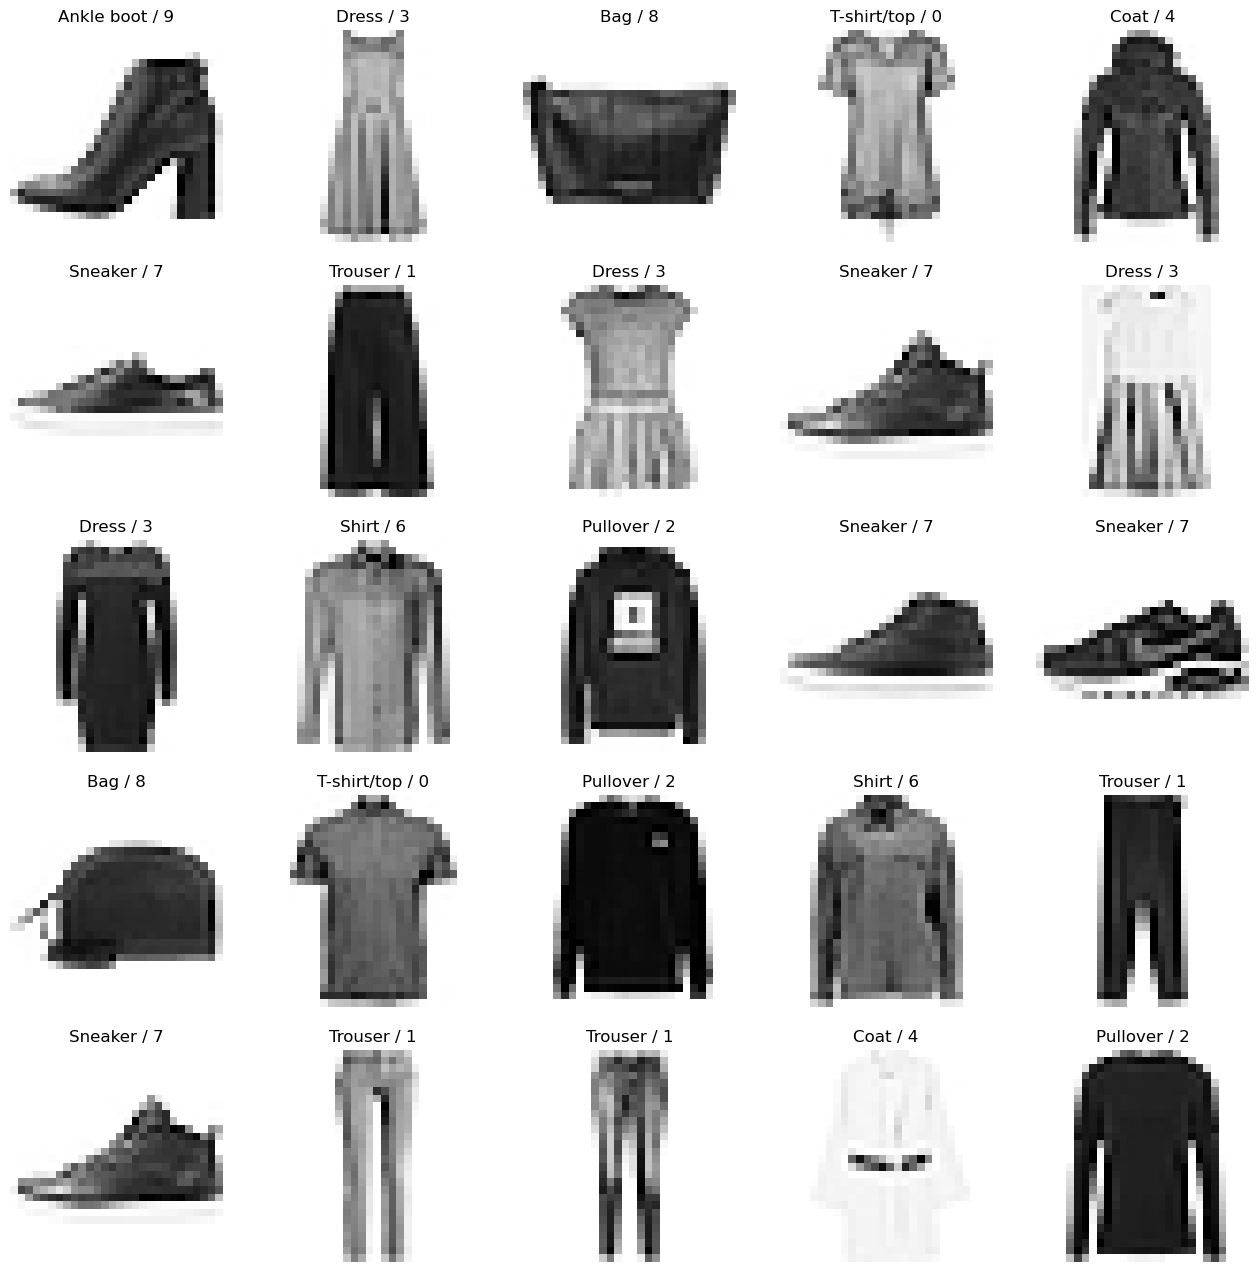

In [11]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(xtrain[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[ytrain[i]],ytrain[i]))

In [12]:
#changing dimension
xtrain.ndim

3

In [13]:
xtrain=np.expand_dims(xtrain,-1)
xtest=np.expand_dims(xtest,-1)

In [14]:
#changing dimension
xtrain.ndim

4

In [15]:
xtrain.shape

(60000, 28, 28, 1)

In [16]:
#feature scaling
xtrain=xtrain/255
xtest=xtest/255

In [17]:
xtrain[0].shape

(28, 28, 1)

In [18]:
#splitting dataset
from sklearn.model_selection import train_test_split
xtrain,xval,ytrain,yval=train_test_split(xtrain,ytrain,test_size=0.2,random_state=42)

In [19]:
xtrain.shape

(48000, 28, 28, 1)

In [20]:
xval.shape

(12000, 28, 28, 1)

In [21]:
#Building CNN model
cnn_model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

cnn_model.summary() # get the summary of model

# complie the model
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

# train cnn model
history=cnn_model.fit(xtrain, ytrain, epochs=10, batch_size=512, verbose=1, validation_data=(xval, yval))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

Text(0.5, 1.0, 'Loss evolution')

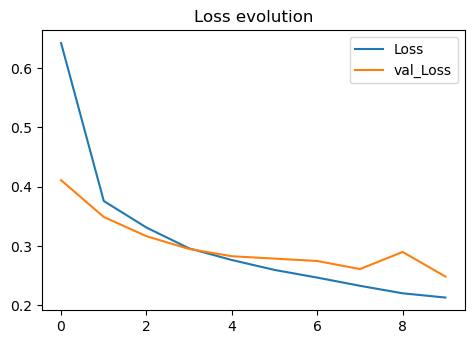

In [22]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

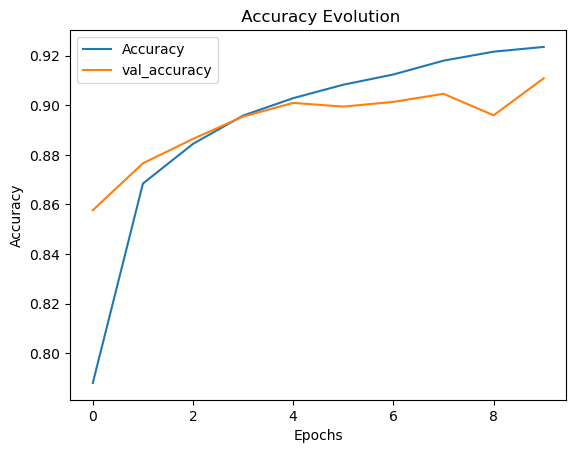

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(" Accuracy Evolution")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'val_accuracy'])
plt.show()

In [24]:
evaluation = cnn_model.evaluate(xtest, ytest)
print(f'Test Accuracy : {evaluation[1]:.3f}')

313/313 [==============================] - 2s 7ms/step - loss: 0.2682 - accuracy: 0.9035
Test Accuracy : 0.904


In [25]:
y_pred = cnn_model.predict(np.expand_dims(xtest[0],axis=0))
y_pred.round(2)

1/1 [==============================] - 0s 114ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98]],
      dtype=float32)

In [26]:
np.argmax(y_pred)

9

In [27]:
ytest[0]

9

In [28]:
ypred=cnn_model.predict(xtest).round(2)

313/313 [==============================] - 2s 6ms/step


In [29]:
ypred

array([[0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.14, 0.03, 0.  ]], dtype=float32)

In [30]:
# Assuming 'model' is your Keras Sequential model
predictions = cnn_model.predict(xtest)  # Replace 'your_input_data' with your actual input data

# Extract the predicted classes
predicted_classes = predictions.argmax(axis=-1)

# 'predicted_classes' now contains the predicted class labels for your input data

313/313 [==============================] - 2s 7ms/step


<Axes: >

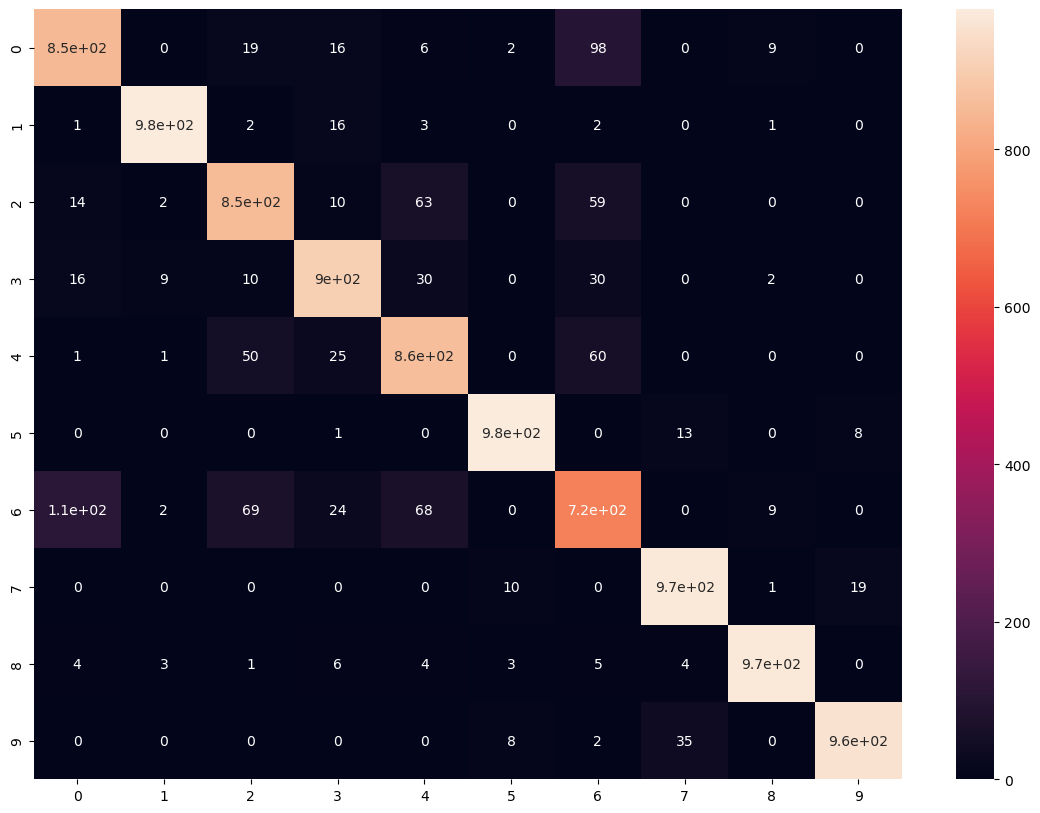

In [31]:
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(ytest, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cmatrix, annot=True)

In [32]:
cnn_model.evaluate(xtest,ytest)

313/313 [==============================] - 2s 7ms/step - loss: 0.2682 - accuracy: 0.9035


[0.2681905925273895, 0.9035000205039978]

In [33]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]

print(classification_report(ytest, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.85      0.85      1000
     Class 1       0.98      0.97      0.98      1000
     Class 2       0.85      0.85      0.85      1000
     Class 3       0.90      0.90      0.90      1000
     Class 4       0.83      0.86      0.85      1000
     Class 5       0.98      0.98      0.98      1000
     Class 6       0.74      0.72      0.73      1000
     Class 7       0.95      0.97      0.96      1000
     Class 8       0.98      0.97      0.97      1000
     Class 9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



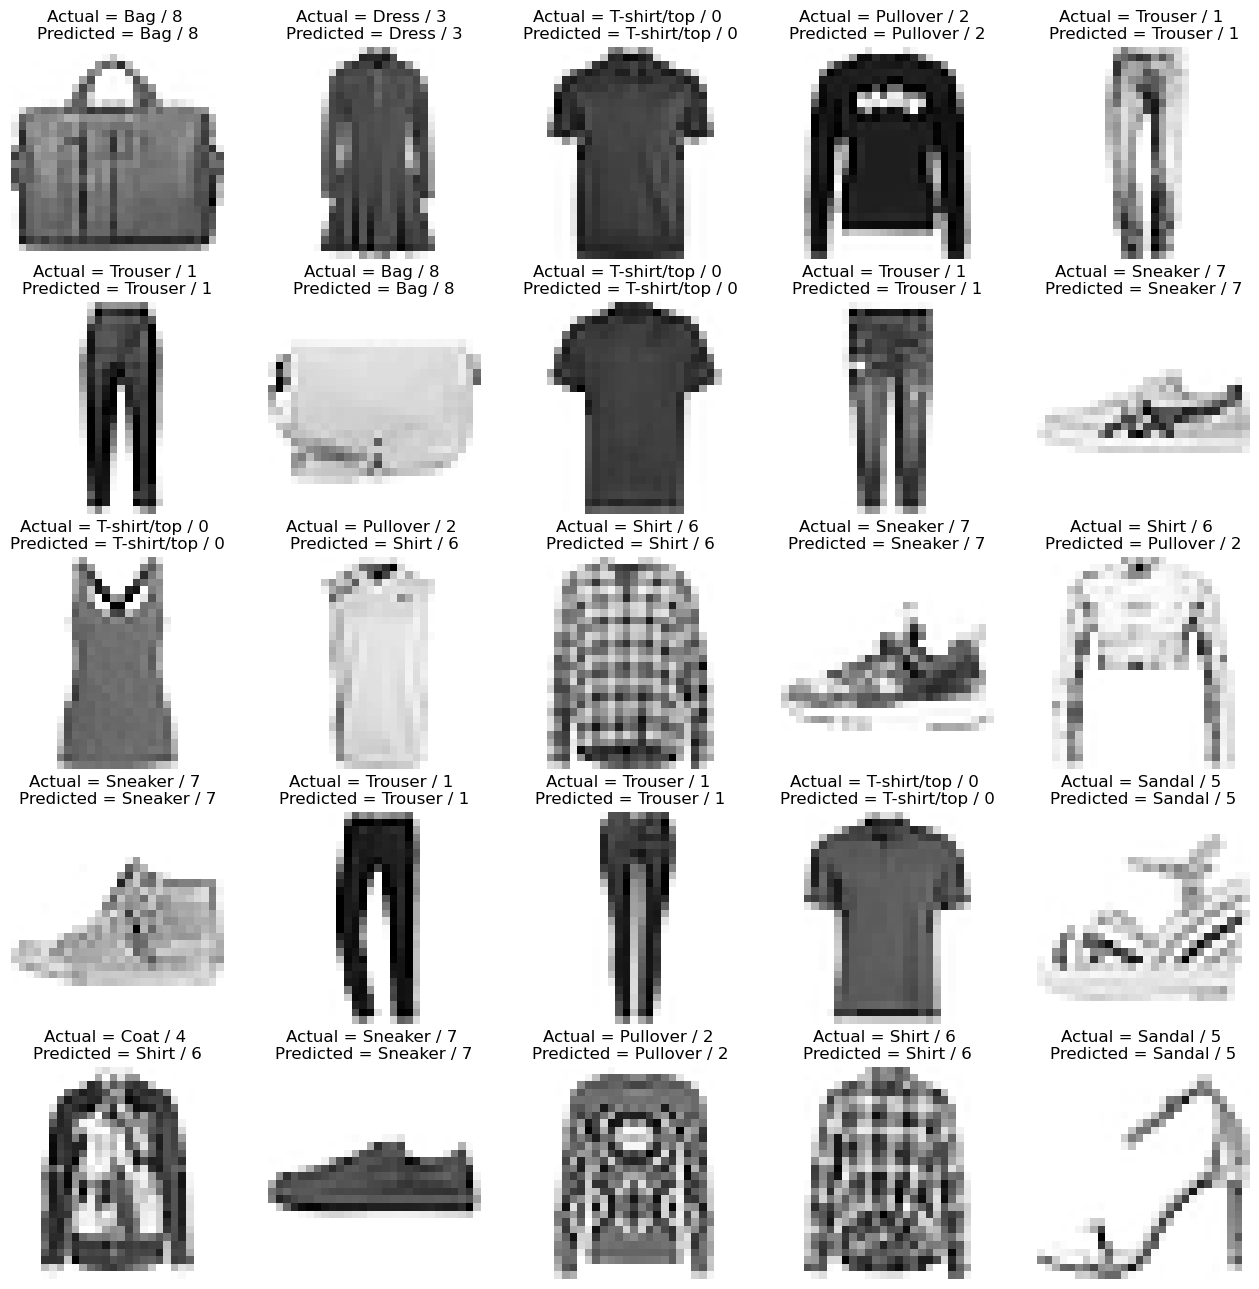

In [34]:
#visualise op
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(xtest[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[ytest[i]], ytest[i], class_labels[np.argmax(ypred[i])],np.argmax(ypred[i])))
  plt.axis('off')